## Data Cleaning

The main focus of this notebook is to create a fairly workable data set that we will use for the rest of the project to conduct visualizations, and base our models off/hypotheses. For the EDA checkpoint, the dataset will be incomplete as there is a lot of imputation/manipulation we will need to do to have all counties accounted for. 

Two Plots (at the moment):

- **Diabetes Rates (%) vs. Unemployment Rate** and correlation coefficient of **0.19**
- **Diabetes Rates (%) vs. Personal Income Per Capita** and correlation coefficient of **0.29**                                                                                                                                             

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes_rates_test = pd.read_csv('us_county_diabetes_rates.csv')
diabetes_rates_test['CountyFIPS'] = diabetes_rates_test['CountyFIPS'].astype(str)
# percentage, lower limit, upper limit of adults aged 20+ diagnosed with diabetes 
# data as of 2021 -- all counties except all of Florida and 8 other counties have 'No Data'
# going to impute previous year (2020) for 2021 data for all missing counties -- have already done it for Florida but not the 8 counties

In [3]:
diabetes_rates_test = diabetes_rates_test.replace('No Data', np.nan)

# Since the csv encodes null values as No Data, replacing with nan so they are easier to find using isnan()


#diabetes_rates_test[(diabetes_rates_test['no_percentage'] == True) & (diabetes_rates_test['State'] == 'Florida')] # all counties of florida are null

In [4]:
florida_diabetes_2020 = pd.read_csv('flo_2020_diabetes.csv')
florida_diabetes_2020['CountyFIPS'] = florida_diabetes_2020['CountyFIPS'].astype(str)

# flo['Percentage'] = flo['Percentage'].astype(float)
# flo['Lower Limit'] = flo['Lower Limit'].astype(float)
# flo['Upper Limit'] = flo['Upper Limit'].astype(float)

In [5]:
no_nans = diabetes_rates_test.dropna(subset='Percentage').reset_index(drop = True)

# dropped any counties that don't have percentage, UL, LL

In [6]:
with_florida = pd.concat([no_nans, florida_diabetes_2020]).reset_index(drop = True)
with_florida 

# with_florida csv is all counties that have percentage, LL, and UL values (NOT including the 8 counties that don't have data -- will account for this later)

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Teton County,Wyoming,56039,4.4,3.1,6
1,Gallatin County,Montana,30031,4.7,3.5,6
2,San Juan County,Washington,53055,4.7,3.2,6.1
3,Summit County,Colorado,8117,5.1,3.5,7.2
4,Blaine County,Idaho,16013,5.1,3.6,7
...,...,...,...,...,...,...
3138,Lafayette County,Florida,12067,9.3,6.5,12.5
3139,Lake County,Florida,12069,11.0,9.0,13.4
3140,Lee County,Florida,12071,7.6,6.1,9.2
3141,Leon County,Florida,12073,8.3,6.3,10.5


In [7]:
with_florida['Percentage'] = with_florida['Percentage'].astype(float)
with_florida['Lower Limit'] = with_florida['Lower Limit'].astype(float)
with_florida['Upper Limit'] = with_florida[' Upper Limit'].astype(float)

# Percentage is originally type 'str', converted to float so that they can be plotted

In [8]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

# ^^ pasted from norcal82's github -- thanks! 


# Plots each state's county diabetes rates: 

# for s in state_names:
#     plt.figure()
#     plt.title(s)
#     d_state = with_florida[combined_df['State'] == s]
#     plt.hist(d_state['Percentage'])
#     plt.show()
    

# THIS IS for each state, the distribution is 

In [9]:
unemployment_df = pd.read_csv('laucnty21.csv', converters={'County FIPS Code': str})

# FIPS Code converted to string.. originally as an integer-- this is to be able to index on string

In [10]:
unemployment_df['State FIPS Code'] = unemployment_df['State FIPS Code'].astype(str)
# Do this conversion after so that leading 0's are retained!  (unlike above)

unemployment_df

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,CN0100100000000,1,001,"Autauga County, AL",2021,"26,682","25,949",733,2.7
1,CN0100300000000,1,003,"Baldwin County, AL",2021,"107,386","104,485","2,901",2.7
2,CN0100500000000,1,005,"Barbour County, AL",2021,"9,048","8,591",457,5.1
3,CN0100700000000,1,007,"Bibb County, AL",2021,"8,636","8,345",291,3.4
4,CN0100900000000,1,009,"Blount County, AL",2021,"25,760","25,173",587,2.3
...,...,...,...,...,...,...,...,...,...
3138,CN5603700000000,56,037,"Sweetwater County, WY",2021,"19,877","18,796","1,081",5.4
3139,CN5603900000000,56,039,"Teton County, WY",2021,"15,318","14,793",525,3.4
3140,CN5604100000000,56,041,"Uinta County, WY",2021,"10,004","9,549",455,4.5
3141,CN5604300000000,56,043,"Washakie County, WY",2021,"4,164","4,003",161,3.9


In [11]:
unemployment_df['combined FIPS'] = unemployment_df['State FIPS Code'] + unemployment_df['County FIPS Code']
unemployment_df
# Formatted as FIPS is in diabetes so that they can be merged

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),combined FIPS
0,CN0100100000000,1,001,"Autauga County, AL",2021,"26,682","25,949",733,2.7,1001
1,CN0100300000000,1,003,"Baldwin County, AL",2021,"107,386","104,485","2,901",2.7,1003
2,CN0100500000000,1,005,"Barbour County, AL",2021,"9,048","8,591",457,5.1,1005
3,CN0100700000000,1,007,"Bibb County, AL",2021,"8,636","8,345",291,3.4,1007
4,CN0100900000000,1,009,"Blount County, AL",2021,"25,760","25,173",587,2.3,1009
...,...,...,...,...,...,...,...,...,...,...
3138,CN5603700000000,56,037,"Sweetwater County, WY",2021,"19,877","18,796","1,081",5.4,56037
3139,CN5603900000000,56,039,"Teton County, WY",2021,"15,318","14,793",525,3.4,56039
3140,CN5604100000000,56,041,"Uinta County, WY",2021,"10,004","9,549",455,4.5,56041
3141,CN5604300000000,56,043,"Washakie County, WY",2021,"4,164","4,003",161,3.9,56043


In [12]:
diabetes_unemployment = with_florida.merge(unemployment_df, left_on = 'CountyFIPS', right_on = 'combined FIPS')
diabetes_unemployment.drop(columns = ['County Name/State Abbreviation', 'Year'])

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,Upper Limit,LAUS Code,State FIPS Code,County FIPS Code,Labor Force,Employed,Unemployed,Unemployment Rate (%),combined FIPS
0,Teton County,Wyoming,56039,4.4,3.1,6,6.0,CN5603900000000,56,039,"15,318","14,793",525,3.4,56039
1,Gallatin County,Montana,30031,4.7,3.5,6,6.0,CN3003100000000,30,031,"71,103","69,291","1,812",2.5,30031
2,San Juan County,Washington,53055,4.7,3.2,6.1,6.1,CN5305500000000,53,055,"8,192","7,789",403,4.9,53055
3,Summit County,Colorado,8117,5.1,3.5,7.2,7.2,CN0811700000000,8,117,"19,608","18,676",932,4.8,8117
4,Blaine County,Idaho,16013,5.1,3.6,7,7.0,CN1601300000000,16,013,"13,038","12,561",477,3.7,16013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Lafayette County,Florida,12067,9.3,6.5,12.5,12.5,CN1206700000000,12,067,"2,540","2,419",121,4.8,12067
3130,Lake County,Florida,12069,11.0,9.0,13.4,13.4,CN1206900000000,12,069,"170,389","162,570","7,819",4.6,12069
3131,Lee County,Florida,12071,7.6,6.1,9.2,9.2,CN1207100000000,12,071,"347,884","332,530","15,354",4.4,12071
3132,Leon County,Florida,12073,8.3,6.3,10.5,10.5,CN1207300000000,12,073,"155,084","148,394","6,690",4.3,12073


In [13]:
diabetes_unemployment

# contains information on county level and unemployment -- 9 more missing 

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,Upper Limit,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),combined FIPS
0,Teton County,Wyoming,56039,4.4,3.1,6,6.0,CN5603900000000,56,039,"Teton County, WY",2021,"15,318","14,793",525,3.4,56039
1,Gallatin County,Montana,30031,4.7,3.5,6,6.0,CN3003100000000,30,031,"Gallatin County, MT",2021,"71,103","69,291","1,812",2.5,30031
2,San Juan County,Washington,53055,4.7,3.2,6.1,6.1,CN5305500000000,53,055,"San Juan County, WA",2021,"8,192","7,789",403,4.9,53055
3,Summit County,Colorado,8117,5.1,3.5,7.2,7.2,CN0811700000000,8,117,"Summit County, CO",2021,"19,608","18,676",932,4.8,8117
4,Blaine County,Idaho,16013,5.1,3.6,7,7.0,CN1601300000000,16,013,"Blaine County, ID",2021,"13,038","12,561",477,3.7,16013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Lafayette County,Florida,12067,9.3,6.5,12.5,12.5,CN1206700000000,12,067,"Lafayette County, FL",2021,"2,540","2,419",121,4.8,12067
3130,Lake County,Florida,12069,11.0,9.0,13.4,13.4,CN1206900000000,12,069,"Lake County, FL",2021,"170,389","162,570","7,819",4.6,12069
3131,Lee County,Florida,12071,7.6,6.1,9.2,9.2,CN1207100000000,12,071,"Lee County, FL",2021,"347,884","332,530","15,354",4.4,12071
3132,Leon County,Florida,12073,8.3,6.3,10.5,10.5,CN1207300000000,12,073,"Leon County, FL",2021,"155,084","148,394","6,690",4.3,12073


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

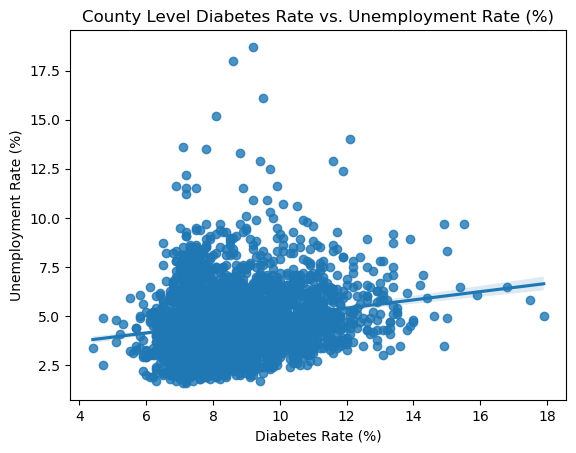

In [15]:
#final_df.plot.scatter(x='Percentage', y='Unemployment Rate (%)')
fig = sns.regplot(data = diabetes_unemployment, x='Percentage', y='Unemployment Rate (%)')
plt.title('County Level Diabetes Rate vs. Unemployment Rate (%)')
plt.xlabel('Diabetes Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [16]:
diabetes_unemployment[['Percentage', 'Unemployment Rate (%)']].corr()

# There is a weak positive correlation between Diabetes Rates and Unemployment Rates

,Percentage,Unemployment Rate (%)
Percentage,1.000000,0.195237
Unemployment Rate (%),0.195237,1.000000


In [17]:
county_info_small = pd.read_csv('county_info_small.csv')
personal_income = county_info_small[county_info_small['Description'] == ' Per capita net earnings 4/'].reset_index(drop = True)

# personal_income is data frame containing per capita personal income for each county (rather than other Descriptions)

In [18]:
personal_income

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2018,2019,2021,2022,2023
0,"""01000""",Alabama,5,CAINC30,120,...,Per capita net earnings 4/,Dollars,24452,25301,27842,29718,31195
1,"""01001""","Autauga, AL",5,CAINC30,120,...,Per capita net earnings 4/,Dollars,25796,26798,29300,31156,33640
2,"""01003""","Baldwin, AL",5,CAINC30,120,...,Per capita net earnings 4/,Dollars,26341,26957,30176,31729,33953
3,"""01005""","Barbour, AL",5,CAINC30,120,...,Per capita net earnings 4/,Dollars,17101,17240,18693,19720,19320
4,"""01007""","Bibb, AL",5,CAINC30,120,...,Per capita net earnings 4/,Dollars,17610,18727,20219,21976,23003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,"""56037""","Sweetwater, WY",7,CAINC30,120,...,Per capita net earnings 4/,Dollars,40495,41454,37832,41237,43955
3187,"""56039""","Teton, WY",7,CAINC30,120,...,Per capita net earnings 4/,Dollars,58533,62445,93615,95686,104988
3188,"""56041""","Uinta, WY",7,CAINC30,120,...,Per capita net earnings 4/,Dollars,25199,25989,25814,27071,28801
3189,"""56043""","Washakie, WY",7,CAINC30,120,...,Per capita net earnings 4/,Dollars,25046,25262,29232,28824,29445


In [19]:
# p[1:len(p)] for p in personal_income['GeoFIPS'] 

personal_income['GeoFIPS'] = personal_income['GeoFIPS'].str.strip(' " " ')
personal_income['GeoFIPS'] = [p[2:len(p)] if p[0] == '0' else p for p in personal_income['GeoFIPS']]

# reformatting FIPS code so that it can be joined with diabetes_unemployment table

In [20]:
counties_df = diabetes_unemployment.merge(personal_income, left_on = 'CountyFIPS', right_on = 'GeoFIPS')
counties_df

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,Upper Limit,LAUS Code,State FIPS Code,County FIPS Code,...,TableName,LineCode,IndustryClassification,Description,Unit,2018,2019,2021,2022,2023
0,Teton County,Wyoming,56039,4.4,3.1,6,6.0,CN5603900000000,56,039,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,58533,62445,93615,95686,104988
1,Gallatin County,Montana,30031,4.7,3.5,6,6.0,CN3003100000000,30,031,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,32524,34324,43275,48024,51557
2,San Juan County,Washington,53055,4.7,3.2,6.1,6.1,CN5305500000000,53,055,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,23410,24497,28238,31082,33341
3,Blaine County,Idaho,16013,5.1,3.6,7,7.0,CN1601300000000,16,013,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,38548,40463,49367,49485,51937
4,Beaufort County,South Carolina,45013,5.5,4.4,6.8,6.8,CN4501300000000,45,013,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,24669,25966,28790,29809,31037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,Lafayette County,Florida,12067,9.3,6.5,12.5,12.5,CN1206700000000,12,067,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,14324,14335,16195,19053,19867
2769,Lake County,Florida,12069,11.0,9.0,13.4,13.4,CN1206900000000,12,069,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,21744,22560,25167,27525,29580
2770,Lee County,Florida,12071,7.6,6.1,9.2,9.2,CN1207100000000,12,071,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,22292,22292,24245,25705,27483
2771,Leon County,Florida,12073,8.3,6.3,10.5,10.5,CN1207300000000,12,073,...,CAINC30,120,...,Per capita net earnings 4/,Dollars,28086,29142,32341,33589,35957


/tmp/ipykernel_5047/3736038004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_income['2021'] = diabetes_income['2021'].astype(int)


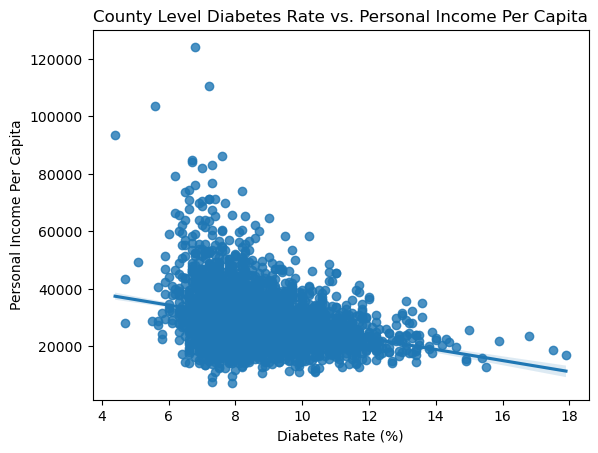

In [21]:
diabetes_income = counties_df[['Percentage', '2021']]
diabetes_income['2021'] = diabetes_income['2021'].astype(int)

fig = sns.regplot(data = diabetes_income, x='Percentage', y='2021')
# 2021 (personal income for that year) is encoded as string, convert to int so that it is quantitative ^^

# plt.scatter(data = diabetes_income, x = 'Percentage', y = '2021')
plt.title('County Level Diabetes Rate vs. Personal Income Per Capita')
plt.xlabel('Diabetes Rate (%)')
plt.ylabel('Personal Income Per Capita')
plt.show()

In [22]:
diabetes_income[['Percentage', '2021']].corr()

,Percentage,2021
Percentage,1.000000,-0.291239
2021,-0.291239,1.000000
